# Word Embeddings

In [3]:
import gensim
import pandas
model = gensim.models.KeyedVectors.load_word2vec_format('data/PubMed-w2v.bin',  binary=True)
print("model loading complete")

In [45]:
def show_wemb(word):
    return(model[word], model.most_similar(word, topn=5))

In [47]:
show_wemb('atelectasis')

(array([-0.23673499, -0.4481991 ,  0.30250457, -0.20286322,  0.18694602,
        -0.15878507, -0.3010417 , -0.09386427, -0.19272074,  0.12198242,
         0.11348098, -0.09375317, -0.14881355,  0.22540739, -0.12198105,
        -0.37750322, -0.00137511,  0.27657032, -0.14257929, -0.46587306,
        -0.24941853, -0.02952368, -0.25832894, -0.34048975,  0.17877978,
         0.04530624, -0.09440142,  0.05741891,  0.05429044, -0.06828617,
         0.17586815,  0.4502523 , -0.21335429,  0.08809736,  0.00980601,
         0.12982392,  0.19008146, -0.07034857, -0.13614759, -0.06564466,
        -0.15269096, -0.26653668,  0.13202852, -0.15569419, -0.05258747,
        -0.13559096, -0.17589572, -0.16365717, -0.23109815, -0.34404707,
         0.09919615,  0.05672965,  0.17051831,  0.1676709 , -0.17358525,
        -0.41364306, -0.38710663,  0.07760689,  0.2376216 , -0.3388885 ,
        -0.12057309, -0.0730748 ,  0.2541976 , -0.37297913,  0.2961591 ,
         0.24444568,  0.09002301,  0.19271661,  0.2

In [48]:
show_wemb('hypertension')

(array([-0.33040273, -0.09043823,  0.04094224, -0.03693173,  0.00720769,
        -0.0092717 , -0.12369595, -0.26870164, -0.16244859, -0.06971864,
        -0.06666104,  0.05075341,  0.08185872,  0.4354743 ,  0.24756862,
        -0.08772765,  0.07420239, -0.06486768,  0.15946147, -0.13038492,
         0.08428849,  0.00484104, -0.12631701, -0.15448771, -0.07290309,
        -0.32272953, -0.11203589,  0.03858548, -0.2549499 , -0.23189627,
         0.14787807,  0.13872612,  0.13541095, -0.11976493,  0.17533028,
        -0.29993233,  0.18555349,  0.28802982, -0.12800391, -0.0882471 ,
        -0.4558257 ,  0.10342131, -0.09078661,  0.03413086,  0.14723638,
        -0.07716384, -0.00359705, -0.24691139, -0.23110493, -0.27832708,
         0.40153944, -0.21914798, -0.31377453, -0.04738419, -0.22555661,
        -0.2769271 ,  0.16373867,  0.16551629,  0.1549743 ,  0.4941901 ,
         0.12916064,  0.08773155,  0.68544084, -0.5410882 ,  0.17279352,
         0.08768956,  0.5538039 ,  0.13779847,  0.0

In [49]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)
filenames = findFiles('data/word-classes/McIC-09/*.txt')
row_names = pandas.DataFrame(list(map(lambda fn: os.path.splitext(os.path.basename(fn))[0], filenames)))
row_names

,0
0,TUMR
1,SIGN
2,DRUG
3,MUTN
4,CLNE
5,ANTI
6,DISE
7,FUNC
8,CELL
9,PROT


In [50]:
import random
keys = []
for filepath in filenames:
    with open(filepath) as f:
        keys.append(random.choice(f.read().splitlines()))

pandas.DataFrame(keys)

,0
0,osteosarcoma
1,fever
2,penicillin
3,C677T
4,Jurkat
5,IgG
6,hepatitis
7,helicase
8,HUVEC
9,actin


In [51]:

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

pandas.DataFrame(word_clusters, index=row_names[0])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,,,,,,,,,,,,,,,,,,,,,
TUMR,chondrosarcoma,osteosarcomas,neuroblastoma,medulloblastoma,rhabdomyosarcoma,glioma,fibrosarcoma,melanoma,hepatoblastoma,ESFT,...,HS-Os-1,LM8,MG-63,neuroblastomas,astrocytoma/glioblastoma,U-2OS,143B,non-metastatic,PTHrP-producing,neuroepithelioma
SIGN,fevers,pyrexia,Fever,Congo-Crimean,diarrhea,Dengue/dengue,arthralgia,Crimea-Congo,chills,exanthema,...,C-CHF,feverish,myalgia,fever-associated,arthralgias,Pharyngoconjunctival,polyserositis,serositis,Boutonneuse,break-bone
DRUG,ampicillin,benzylpenicillin,erythromycin,cloxacillin,gentamycin,vancomycin,ceftriaxone,gentamicin,Ampicillin,Penicillin,...,cefotaxime,mecillinam,streptomycin,spectinomycin,lincomycin,nafcillin,penicillins,amoxycillin/clavulanate,trimethoprim-sulfamethoxazole,cotrimoxazole
MUTN,A1298C,methylenetetrahydrofolate,C667T,677C/T,MTHFR,677TT,G1793A,677T,677C-T,677C,...,methylenetetrahydropholate,T677T,rs1801131,T677,677CT,methylene-tetrahydrofolate,A2756G,A222V,C677T/A1298C,c.677C
CLNE,MOLT-4,Molt-4,JURKAT,Molt-3,U937,HUT-78,HPB-ALL,K562,HTLV-I-transformed,MOLT4,...,HL-60,CEM,Daudi,Kit225,SupT1,HL60,Hut-78,jurkat,E6.1,HSB2
ANTI,IgM,IgG1-4,IgA,(Ig)G,IgG1,anti-LPS,anti-F(ab')2,anti-SEA,IgG-class,antitreponemal,...,(Ig)M,anti-IgG,anti-ICS,IgG4,IgG3,anti-PA,IgG-1,anti-BSA,anti-beta-lactoglobulin,Anti-OA
DISE,Hepatitis,hepatits,anti-hepatitis,HIV-hepatitis,hepatitides,antihepatitis,HBV,hepatitis-B,NANB,HCV,...,e-system,e-antigen,C-virus,NANBH,virus/hepatitis,NANB/C,virus-DNA,non-A/non-B,B/hepatitis,VHB
FUNC,helicases,primase,Helicase,unwinds,polymerase-associated,PriA,UvrD,polymerases,RECQ1,PcrA,...,RH70,endoribonuclease,Cdc45-MCM-GINS,Hef,DExD-box,RecJ,transesterase,primosome,primases,ATPase/helicase
CELL,HUVECs,HUVE,HMEC-1,ECs,HMVEC,HCAEC,BAEC,HAECs,HPMEC,ECV304,...,HLMVEC,HUAEC,HUAECs,TNF-alpha-activated,cells(HUVECs),HIVEC,vein-derived,PAECs,HCAECs,HPMECs


In [56]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=20, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

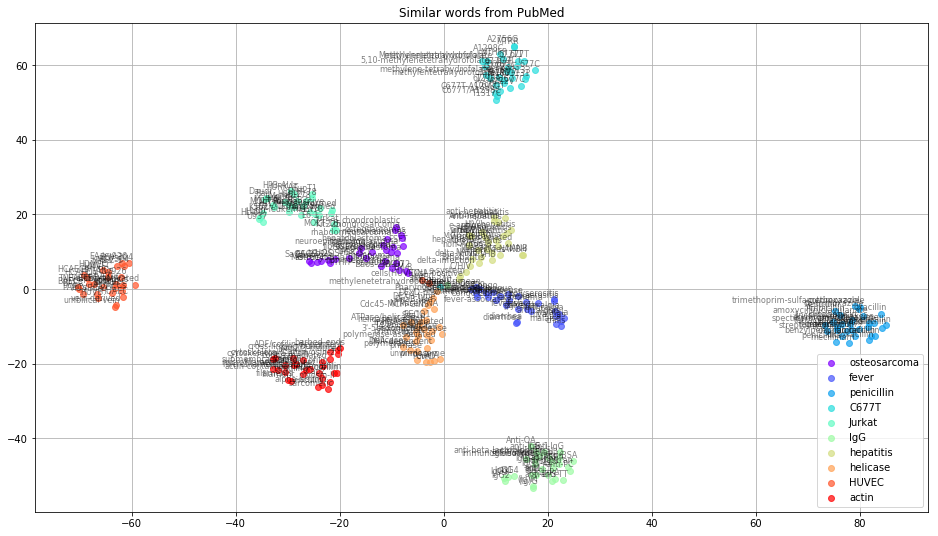

In [55]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from PubMed', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


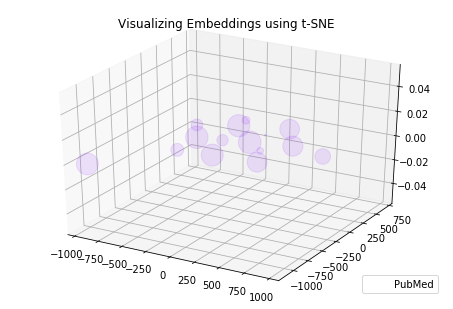

In [38]:
from mpl_toolkits.mplot3d import Axes3D

tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings)

def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

tsne_plot_3d('Visualizing Embeddings using t-SNE', 'PubMed', embeddings_wp_3d, a=0.1)